In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Sposts.csv')

In [3]:
df.head()

,Title,Score,Comments,URL
0,India Q2 GDP: GDP Growth Hits 8-Quarter Low at...,119,64,https://www.reddit.com/r/IndianStockMarket/com...
1,What's going on with Adani stocks ? I bought i...,77,77,https://www.reddit.com/r/IndianStockMarket/com...
2,Hold some cash,18,11,https://www.reddit.com/r/IndianStockMarket/com...
3,Goodbye to weekly expiries,38,40,https://www.reddit.com/r/IndianStockMarket/com...
4,This is what FII knew when they were selling.,11,8,https://www.reddit.com/r/IndianStockMarket/com...


In [4]:
df.shape

(50, 4)

In [5]:
import re

In [6]:
#removing unnecessary special characters
def cleanTitle(txt):
  cleantext = re.sub('https\S+\s'," ",txt)
  cleantext = re.sub('#\S+\s'," ",cleantext)
  cleantext = re.sub('RT|cc'," ",cleantext)
  cleantext = re.sub('@\S+\s'," ",cleantext)
  cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")," ",cleantext)
  return cleantext

In [7]:
df['Title'] = df['Title'].apply(lambda x: cleanTitle(x))

In [8]:
df['Title']

0     India Q2 GDP  GDP Growth Hits 8 Quarter Low at...
1     What s going on with Adani stocks   I bought i...
2                                        Hold some cash
3                           Goodbye to weekly expiries 
4         This is what FII knew when they were selling 
5     Shoonya App is down  Barely any a ountability ...
6                  What is wrong with these TV analysts
7     45 new stocks added in derivatives segment mak...
8                             Groww Close Out Procedure
9                                Market on Nov 29  2024
10                              BEL   NPTC green energy
11    Investment strategy with a salary of Rs 20k pe...
12    charting site software that allows me to resea...
13          How does short sellers make money in India 
14    How do full time investors make money consiste...
15                           Is shoonya working today  
16                                  Iska maa k FII MARU
17    I genuinely feel for Tata motors  it s all

In [9]:
df.head()

,Title,Score,Comments,URL
0,India Q2 GDP GDP Growth Hits 8 Quarter Low at...,119,64,https://www.reddit.com/r/IndianStockMarket/com...
1,What s going on with Adani stocks I bought i...,77,77,https://www.reddit.com/r/IndianStockMarket/com...
2,Hold some cash,18,11,https://www.reddit.com/r/IndianStockMarket/com...
3,Goodbye to weekly expiries,38,40,https://www.reddit.com/r/IndianStockMarket/com...
4,This is what FII knew when they were selling,11,8,https://www.reddit.com/r/IndianStockMarket/com...


In [10]:
df.isnull().sum()

Title       0
Score       0
Comments    0
URL         0
dtype: int64

In [10]:
df.drop(['URL'],axis=1, inplace= True)

In [11]:
df.columns

Index(['Title', 'Score', 'Comments'], dtype='object')

In [12]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Mateen\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [13]:
from textblob import TextBlob

In [14]:
#Sentiment Polarity
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['Title'].apply(analyze_sentiment)

df[['Title','Sentiment']].head(10)

,Title,Sentiment
0,India Q2 GDP GDP Growth Hits 8 Quarter Low at...,-0.077778
1,What s going on with Adani stocks I bought i...,0.000000
2,Hold some cash,0.000000
3,Goodbye to weekly expiries,0.000000
4,This is what FII knew when they were selling,0.000000
5,Shoonya App is down Barely any a ountability ...,-0.035185
6,What is wrong with these TV analysts,-0.500000
7,45 new stocks added in derivatives segment mak...,0.068182
8,Groww Close Out Procedure,0.000000
9,Market on Nov 29 2024,0.000000


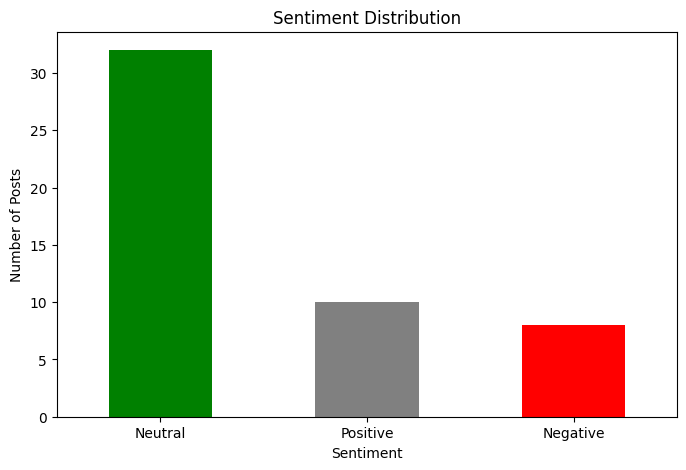

SentimentCategory
Neutral     32
Positive    10
Negative     8
Name: count, dtype: int64


In [26]:
# visual representation of sentiment Distribution
# Categorizing sentiment polarity into Positive, Neutral, and Negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

# Count sentiment categories
sentiment_counts = df['SentimentCategory'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()
print(sentiment_counts)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

df['Movement'] = ['up' if x > 0 else 'down' if x < 0 else 'neutral' for x in df['Sentiment']]
X_text = df['Title']
X_numeric = df[['Score', 'Comments']]
y = df['Movement']

# Splitting the dataset
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)
# TF-IDF for text features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Normalize numeric features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)


In [17]:
from scipy.sparse import hstack

# to Combine the text and numeric features
X_train_combined = hstack([X_train_tfidf, X_train_num_scaled])
X_test_combined = hstack([X_test_tfidf, X_test_num_scaled])


In [29]:
# building the RandomForestClassifier algorithm and classification report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_combined, y_train)

y_pred = model.predict(X_test_combined)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       0.00      0.00      0.00         1
     neutral       0.70      1.00      0.82         7
          up       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.23      0.33      0.27        10
weighted avg       0.49      0.70      0.58        10



C:\Users\Mateen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mateen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mateen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [19]:
#building the Logistic Regression alogrithm and classification report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train_combined, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test_combined)

In [22]:
y_pred

array(['neutral', 'neutral', 'neutral', 'neutral', 'up', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral'], dtype=object)

In [24]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       0.00      0.00      0.00         1
     neutral       0.78      1.00      0.88         7
          up       1.00      0.50      0.67         2

    accuracy                           0.80        10
   macro avg       0.59      0.50      0.51        10
weighted avg       0.74      0.80      0.75        10



C:\Users\Mateen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mateen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mateen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train_combined,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test_combined)
y_pred

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'down', 'neutral', 'up'], dtype=object)

In [32]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       0.00      0.00      0.00         1
     neutral       0.75      0.86      0.80         7
          up       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.58      0.45      0.49        10
weighted avg       0.72      0.70      0.69        10

